<h1>Approximate derivatives with Julia</h1>

<p>To get started, we load the <code>MTH229</code> package and a plotting  package:</p>

In [1]:
using MTH229
using Plots

<hr />

<h3>Quick background</h3>

<p>Read about this material here: <a href="http://mth229.github.io/derivatives.html">Approximate derivatives in julia</a>.</p>

<p>For the impatient, A secant line connecting points on the graph of $f(x)$ between $x=c$ and $x = c+h$ has slope:</p>


$$
\frac{f(c+h) - f(c)}{h}.
$$


<p>The slope of the tangent line to the graph of $f(x)$ at the point $(c,f(c))$ is given by taking the limit as $h$ goes to $0$:</p>


$$
\lim_{h \rightarrow 0} \frac{f(c + h) - f(c)}{h}.
$$


<p>The notation for this - when the limit exists - is $f'(c)$.</p>

<p>The <code>MTH229</code> package  provides  a  <code>secant&#40;f,a,b&#41;</code>  and   <code>tangent&#40;f,c&#41;</code> function  to derive functions representing  the  secant  and tangent  line respectively.   In  the following demo,  usable with  `SimplePlots,   we   see  how  the  two  can be  used to  add to  exisiting  graphics:</p>

In [1]:
f(x) = sin(x)
c =  pi/4
@manipulate for n in 1:8
    h = 1/2^n
    plot(sin, 1/2,  pi/2, legend=false, linewidth=1)
    scatter!([c,c+h],[f(c),f(c+h)], markersize=15)
	
    plot!(secant(f,  c, c + h), 1/2, pi/2, linewidth=1)
    plot!(tangent(f,c), 1/2, pi/2,  linewidth=1)
    
end

<p>In general the derivative of a function $f(x)$ is the function $f'(x)$, which returns the slope of the tangent line for each $x$ where it is defined. For many functions, finding the derivative is straightforward, though may be complicated enough to seek alternatives. At times approximating the value is desirable.</p>

<h4>Approximate derivatives</h4>

<p>We can approximate the slope of the tangent line several ways. The <em>forward difference quotient</em> takes a small value of $h$ and uses the value $(f(x+h) - f(x))/h$ as an approximation.</p>

<p>For example, to estimate the derivative of $x^{\ln(x)}$ at $c=2$ with <code>h&#61;1e-6</code> we could have</p>

In [1]:
f(x) = x^log(x)
c, h = 2, 1e-6
(f(c+h) - f(c))/h

1.120685498845475

<p>The above pattern finds the approximate derivative at the point $c$. Though this can be pushed to return a function giving the derivative at any point, we will use the more convenient solution described next for finding the derivative as a function, when applicable.</p>

<h4>Automatic derivatives</h4>

<p>In mathematics we use the notation $f'(x)$ to refer the function that finds the derivative of $f(x)$ at a given $x$. The <code>MTH229</code> package provides the same notation in <code>Julia</code>.  In  the  background, this uses <em>automatic differentiation</em>, as provided by the <code>ForwardDiff</code> package, to compute the  derivative. Automatic differentiation is a tad slower than using a hand-computed derivative, but as accurate as that, and much easier and   more  accurate than using an <em>approximate derivative</em>. </p>

<p>The <code>MTH229</code> package overloads  the default meaning of <code>&#39;</code> allowing the usual notation for a derivative to be used:</p>

In [1]:
f(x) = sin(x)
f'(pi), f''(pi)

(-1.0, -1.2246467991473532e-16)

<p>(This overloading of  a default  meaning  is generally  considered <strong>bad</strong> practice, but it proves  very useful for these  notes. )</p>

<h4>Symbolic derivatives</h4>

<p>Automatic differentiation gives accurate numeric values for first, second, and even higher-order derivatives. It does not however, return the expression one would get were these computed by hand. The <code>diff</code> function from <code>SymPy</code> will find symbolic derivatives, similar to what is achieved when differentiating "by hand," though for many problems the effort will be much less.</p>

<p>The <code>diff</code> function can be called with a function:</p>

In [1]:
f(x) = exp(x^2) * sin(sqrt(x))
diff(f)

<p>A more general usage is supported, but not explored here.</p>

<h3>Tangent lines</h3>

<p>The tangent line to the graph of $f(x)$ at $x=c$ is given by $y=f(c)+f'(c)(x-c)$. It is fairly easy to plot both the function and its tangent line - we just need a function to compute the tangent line.</p>

<p>Here we write an operator to return such a function.  The operator needs to know both the function name and the value $c$ to find the tangent line at $(c, f(c))$ (notice the <code>x-&gt;</code> bit that indicates the following function returns a function):</p>

In [1]:
tangent(f, c) = x -> f(c) + f'(c)*(x-c) # returns a function

<p>(This function is in the <code>MTH229</code> package, so need not be redefined.)</p>

<p>Here we see how to use it:</p>

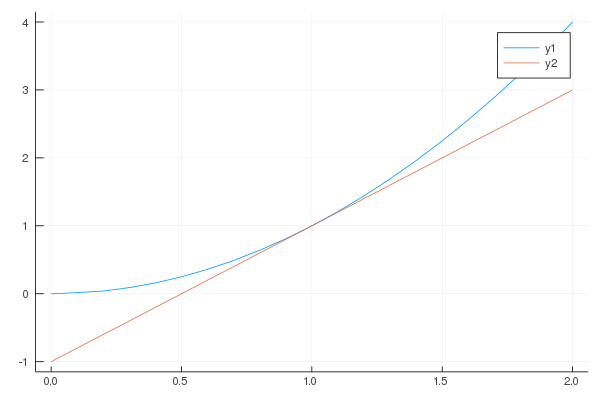

In [1]:
f(x) = x^2			# replace me
plot(f, 0, 2)
plot!(tangent(f, 1), 0, 2)

<h4>Higher-order derivatives</h4>

<p>Higher-order derivates can be computed as well:</p>

<p>Automatic derivatives can be computed using the usual notation, e.g., <code>f&#39;&#39;</code>  to find $f''(x)$.</p>

<p>Higher-order symbolic derivatives can be computed by passing the order to <code>diff</code> as a second argument, as in <code>diff&#40;f, n&#41;</code>.</p>

<p>For example, consider $f(x) = e^x \sin(x)$. We have:</p>

In [1]:
f(x) = exp(x) * sin(x)
f''(3)

-39.769061688293974

<p>As compared to the symbolic answer:</p>

In [1]:
fpp = diff(f,2)

<p>and its numeric  value at <code>3</code>:</p>

In [1]:
N(fpp(3))    # make numeric

-39.76906168829397773129798975944675106812894879110228655084531523121728543571319

<hr />